In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Reinforcement learning with Upper Confidence bound
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [16]:
dataset = pd.read_csv("../../data/Ads_CTR_Optimisation.csv")

In [17]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [22]:
N=10000
d=10
ads_selected = []
no_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (no_of_selections[i]>0):
            avg_reward = sums_of_rewards[i] / no_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / no_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    no_of_selections[ad] = no_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad]=sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
        
        
        

In [23]:
sums_of_rewards

[179, 138, 67, 133, 282, 10, 103, 204, 80, 53]

In [24]:
ads_selected[9990:10000]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

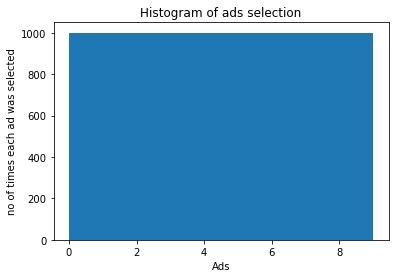

In [25]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('no of times each ad was selected')
plt.show()